# EE 511 Project 3 Report


This is an all-in-one report to EE 511 Project 3, where the explanations, discussions and codes are included.

All experiments are run in Python code.

Import the libs we need in this project.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from scipy.special import comb
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
pi = np.pi
%matplotlib inline

## Exp.1 [Testing Faith]
--------------------------------------------

Load the "old faithful" data set and show its head 10 rows.

In [2]:
old_faithful_data = np.loadtxt('C:\\Users\\ZING\\Desktop\\511\\proj3\\old_faithful_data.txt')
np.shape(old_faithful_data)
X = old_faithful_data[:,1:]
print(X[0:10,:])


[[  3.6    79.   ]
 [  1.8    54.   ]
 [  3.333  74.   ]
 [  2.283  62.   ]
 [  4.533  85.   ]
 [  2.883  55.   ]
 [  4.7    88.   ]
 [  3.6    85.   ]
 [  1.95   51.   ]
 [  4.35   85.   ]]


### K-means Clustering

K-means Clustering is one of so called "prototype-based clustering"s. This type of clusterings assuming the construction of clustering can be represented by a set of prototypes, say centers in K-means.

What K-means Clustering does is that, given unlabeled data set $D=\left\{ {{\boldsymbol{x}}_{i}} \right\},i=1,2,\ldots n$, it minimizes the squared error $I=\sum\limits_{i=1}^{k}{\sum\limits_{\boldsymbol{x}\in {{C}_{i}}}{\left\| \boldsymbol{x}-{{\boldsymbol{\mu }}_{i}}\right\|_{2}^{2}}}$. ${{\left\| \cdot  \right\|}_{2}}$ is Euclidean distance. Here we call $I$ inertia. Note that ${\boldsymbol{\mu }}_{i}$ is the mean of all samples in cluster $k$.

We implement K-means Clustering by constructing a Pyhton class `K_means`. It receives a data tensor with a shape of $(N,f)$, where $f$ is # of features, and the number of clusters $k$, finally returns a tensor with a shape of $(k,f)$, storing the coordinates of cluster centers.

In [2]:
import collections

class K_Means(object):
    '''
    Attributes:
    cluster_centers_ : array, [n_clusters, n_features]
        Coordinates of cluster centers
    labels_ :  Labels of each point
    inertia_ : float
        Sum of squared distances of samples to their closest cluster center.
    converged_ : bool type
    '''
    def __init__(self,n_clusters=8, max_iter=300, tol=1e-6):
        self.n_clusters_ = n_clusters
        self.max_iter_ = max_iter
        self.tol_ = tol
    
    def fit(self,X):
        '''
        X has shape (N,n_features)
        '''
        # initialization #
        X_mean = np.mean(X,0)
        X_Std = np.std(X,0)
        n_features = 1 if X.ndim == 1 else np.shape(X)[1]
        self.n_features = n_features
        N = np.shape(X)[0]
        n_clusters = self.n_clusters_
        cluster_centers_ = np.random.random([n_clusters,n_features])\
            *X_Std[None,:]+X_mean[None,:]
        
        inertia_0 = 1e10
        inertia_1 = 1e10 + 10*self.tol_
        iter_ = 0
        #initialization complete #
        while np.sum(np.abs(inertia_1-inertia_0)) > self.tol_:
            inertia_0 = inertia_1
            Distance = np.sqrt(np.sum((X[:,None,:] - cluster_centers_[None,:,:])\
                                      **2,2))
            #Distance: shape (N,K)
            labels = np.argsort(Distance)[:,0]
            inertia_1 = np.sum(Distance[np.arange(0,N),labels])
            #print(inertia_1)
            #print(labels[0:20])
            #print(cluster_centers_)
            #labels: shape (N,)
            d = collections.Counter(labels) #(k,)
            for i in d:
                cluster_centers_[i,:] = np.mean(X[np.where(labels==i)],0)

            iter_ += 1
            
            if iter_ > self.max_iter_:
                break
        if iter_ > self.max_iter_:
            self.converged_ = False
        else:
            self.converged_ = True
        self.inertia_ = inertia_1
        self.labels_ = labels
        self.cluster_centers_ = cluster_centers_

Instantiate a K_Means object.Assign k=2. Input data and fit it.

In [4]:
kmeans = K_Means(n_clusters=2)
kmeans.fit(X)


Print the two centers and estimated labels for all samples.

In [5]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[  2.09433     54.75      ]
 [  4.29793023  80.28488372]]
[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


Scatter the result.

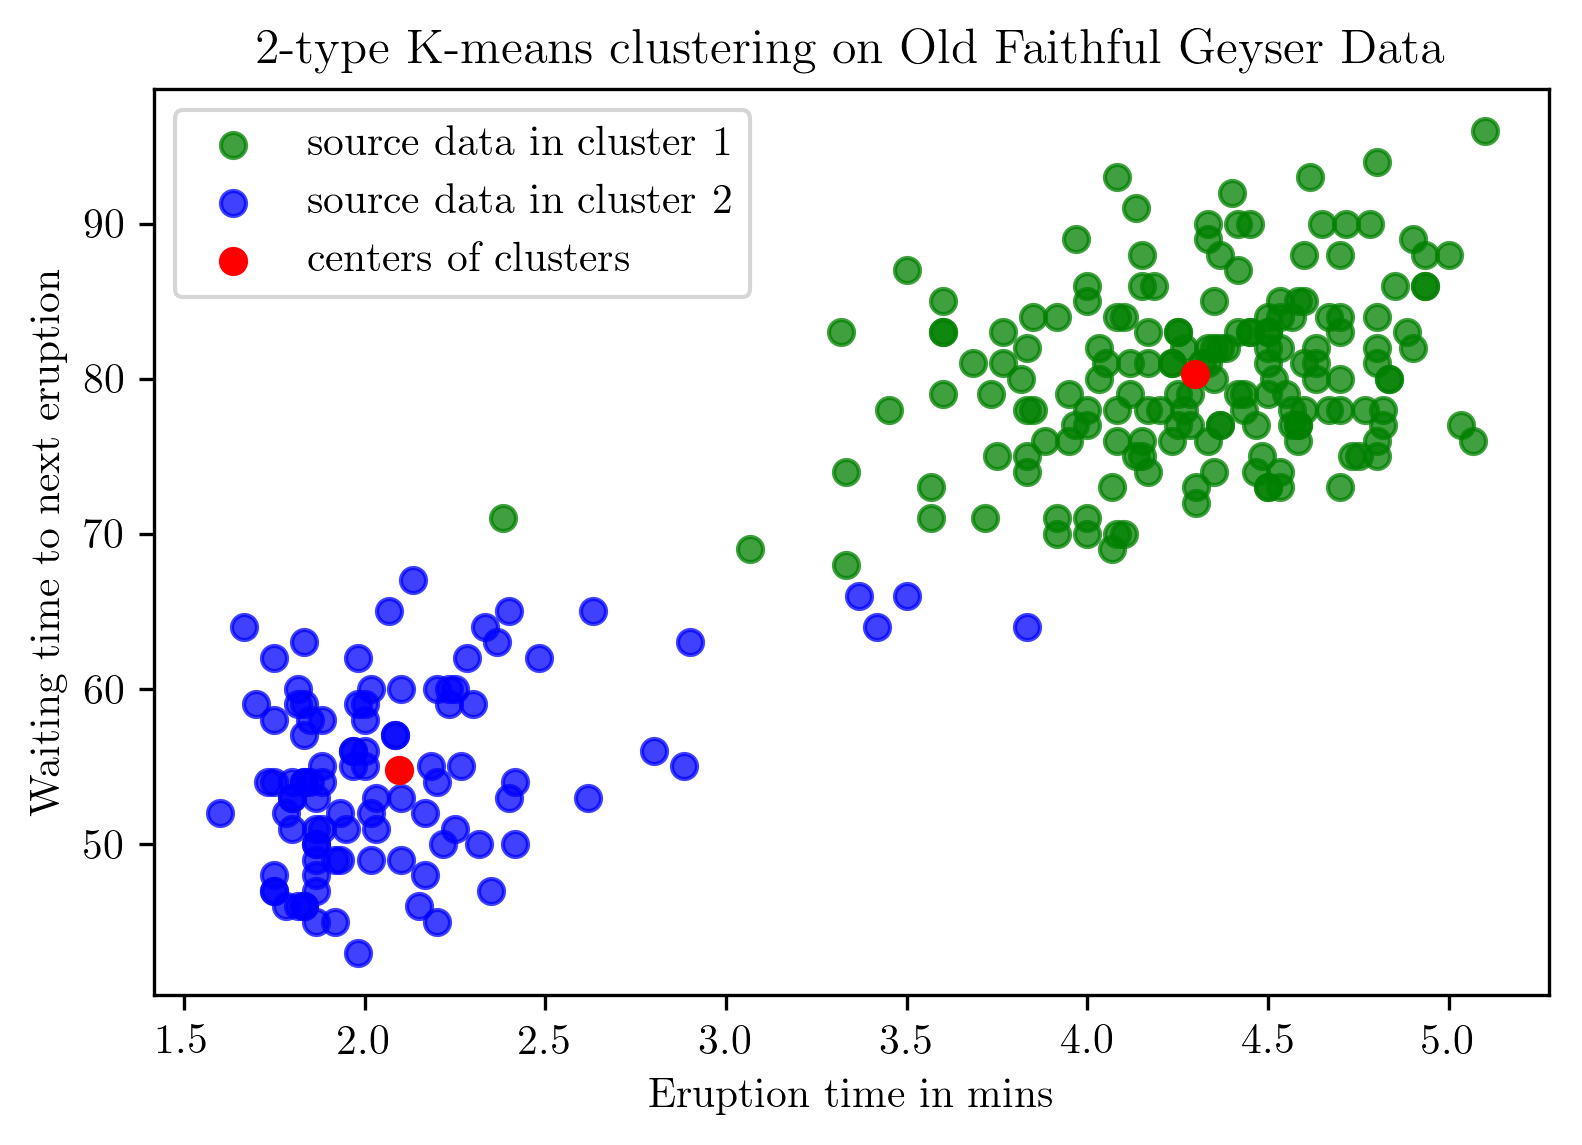

In [6]:
plt.figure(dpi=300)
plt.scatter(X[:,0][(kmeans.labels_.astype('bool'))],
            X[:,1][(kmeans.labels_.astype('bool'))],label = 'source data in cluster 1',
            c='g',alpha = 0.75)
plt.scatter(X[:,0][~(kmeans.labels_.astype('bool'))],
            X[:,1][~(kmeans.labels_.astype('bool'))],label = 'source data in cluster 2',
            c='b',alpha = 0.75)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            label = 'centers of clusters',c = 'r')
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('2-type K-means clustering on Old Faithful Geyser Data')
plt.legend()

## Exp.2 [EM]
--------------------------------------------

### GMM with EM Algorithm

We implement a Gaussian Mixture Model (GMM) with Expectation-maximization algorithm in this section.

A mixture model is a probabilistic model for representing the presence of subpopulations within an overall population(https://en.wikipedia.org/wiki/Mixture_model). The overall PDF of a mixture model with $k$ components(subpopulations) can be written as:

$$p\left( \left. \boldsymbol{x} \right|\boldsymbol{\theta } \right)=\sum\limits_{i=1}^{k}{{{w}_{i}}{{p}_{i}}\left( \left. \boldsymbol{x} \right|{{\boldsymbol{\theta }}_{i}} \right)}$$

where ${{w}_{i}}\ge 0$ is the weight of $i$th component, and obviously there is $\sum\limits_{1}^{k}{{{w}_{i}}}=1$.

Particularly, in a GMM model, all components are multivariate normal distribution. The PDF of multivariate normal distribution is written as:

$$p\left( \boldsymbol{x} \right)=\frac{1}{{{\left( 2\pi  \right)}^{\frac{n}{2}}}{{\left| \boldsymbol{\Sigma  }\right|}^{\frac{1}{2}}}}\exp \left( -\frac{1}{2}{{\left( \boldsymbol{x}-\boldsymbol{\mu } \right)}^{\top }}{{\boldsymbol {\Sigma }}^{-1}}\left( \boldsymbol{x}-\boldsymbol{\mu } \right) \right)$$

where $\boldsymbol{\mu }\in {{\mathbb{R}}^{f}}$ is the mean vector, $\boldsymbol{\Sigma }\in {{\mathbb{R}}^{f\times f}}$ is the covariance matrix. $f$ is # of dimensions. Therefore, the PDF of a GMM with $k$ components is

$$p\left( \boldsymbol{x} \right)=\sum\limits_{i=1}^{k}{{{w}_{i}}\mathcal{N}\left( \left. \boldsymbol{x} \right|{{\boldsymbol{\mu }}_{i}},{{\boldsymbol{\Sigma }}_{i}} \right)}$$

For such a GMM, there are $k+k\left( f+{{f}^{2}} \right)$ parameters in total to be estimated.

To estimated a GMM, we first write its maximum likelihood function given data set $D=\left\{ {{\boldsymbol{x}}_{i}} \right\},i=1,2,\ldots n$:

$$L\left( D \right)=\sum\limits_{j=1}^{N}{\ln \left( \sum\limits_{i=1}^{k}{{{w}_{i}}\mathcal{N}\left( \left. {{\boldsymbol{x}}_{i}} \right|{{\boldsymbol{\mu }}_{i}},{{\boldsymbol{\Sigma }}_{i}} \right)} \right)}$$

We use Expectation-maximization Algorithm to solve it.

In E-step, we calculate memberships functions ${{\gamma }_{ni}}$, for each sample. Membership, the posterior probability, tells the probability of $\boldsymbol{x}_{n}$ being attributed to component $i$. At time step $t+1$, they are given by:

$$\gamma _{ni}^{\left( t+1 \right)}=p\left( \left. {{z}_{n}}=i \right|{{\boldsymbol{x}}_{n}} \right)=\frac{w_{i}^{\left( t \right)}\mathcal{N}\left( {{\boldsymbol{x}}_{n}}\left| \boldsymbol{\mu }_{i}^{\left( t \right)},\boldsymbol{\Sigma }_{i}^{\left( t \right)} \right. \right)}{\sum\limits_{l=1}^{k}{w_{l}^{\left( t \right)}\mathcal{N}\left( {{\boldsymbol{x}}_{n}}\left| \boldsymbol{\mu }_{l}^{\left( t \right)},\boldsymbol{\Sigma }_{l}^{\left( t \right)} \right. \right)}}$$

In M-step, we update all parameters, denoting them at $t+1$ time step. The update formulas are given by solving $L\left(D \right)$ with he method of Lagrange multiplier, as following:

$$\boldsymbol{\mu }_{i}^{\left( t+1 \right)}\text{=}\frac{\sum\limits_{n=1}^{N}{\gamma _{ni}^{\left( t+1 \right)}{{\boldsymbol{x}}_{n}}}}{\sum\limits_{n=1}^{N}{\gamma _{ni}^{\left( t+1 \right)}}}$$

$$\boldsymbol{\Sigma }_{i}^{\left( t+1 \right)}\text{=}\frac{\sum\limits_{n=1}^{N}{\gamma _{ni}^{\left( t+1 \right)}\left( {{\boldsymbol{x}}_{n}}-\boldsymbol{\mu }_{i}^{\left( t+1 \right)} \right)}{{\left( {{\boldsymbol{x}}_{n}}-\boldsymbol{\mu }_{i}^{\left( t+1 \right)} \right)}^{\top }}}{\sum\limits_{n=1}^{N}{\gamma _{ni}^{\left( t+1 \right)}}}$$

$$w_{i}^{\left( t+1 \right)}=\frac{1}{N}\sum\limits_{n=1}^{N}{\gamma _{ni}^{\left( t+1 \right)}}$$

For the sake of simplicity, we vectorize the formulas above. If we write them as `numpy` tensors, `gammas`, `means`, `covariances` and `weights`, then `gammas` has a shape of `(N,k)`, `means` has `(k,f)`, `covariances` has `(k,f,f)` and `weights` has `(k,)`. The data set `X` has `(N,f)`

In [3]:
from scipy.stats import multivariate_normal

class GMM(object):
    '''
    ATTRIBUTES:
    weights_ : array-like, shape (n_components,)
    means_ : array-like, shape (n_components, n_features)
    covariances_ : array-like, shape (n_components, n_features, n_features)
    converged_ : bool type
    n_iter_ : int
    tol_ : float
    max_iter_: int
    membership_: array-like, shape (N,n_components)
    labels: array-like, shape (N,)
    '''
    def __init__(self,n_components=1,n_features=1,weights_init=None, \
                 means_init=None,covariances_init=None,tol=0.001,max_iter=100):
        '''
        parameters
        n_components : int, defaults to 1.
        weights_init : array-like, (defualt) shape (n_components, ), optional
        means_init : array-like, shape (n_components, n_features), optional
            defualt shape(n_components, 1) with all zeros
        tol : float, defaults to 1e-3.
        max_iter : int, defaults to 100.
        '''
        self.__n_features = n_features
        self.__n_components = n_components
        if weights_init is None:
            rand_w = np.random.rand(n_components)
            self.weights_ = rand_w / np.sum(n_components)
        elif type(weights_init).__module__ != np.__name__:
            self.weights_ = np.array(weights_init)
        else:
            self.weights_ = weights_init
            
        if means_init is None:
            self.means_ = np.random.random([n_components,n_features])
        elif type(means_init).__module__ != np.__name__:
            self.means_ = np.array(means_init)
        elif means_init.ndim == 1:
            self.means_ = means_init[:,None]
        else:
            self.means_ = means_init
        
        if covariances_init is None:
            self.covariances_ = (0.5*np.identity(n_features)[None,:,:] + \
                                 0.5*np.ones((n_features,n_features))[None,:,:])\
                                * np.ones([n_components,])[:,None,None]
        elif type(covariances_init).__module__ != np.__name__:
            self.covariances_ = np.array(covariances_init)
        else:
            self.covariances_ = covariances_init
        
        #print(self.covariances_)
        
        self.n_iter_ = 0
        self.tol_ = tol
        self.max_iter_ = max_iter
    
    def __Pick(self,n=1):
        n_components = self.__n_components
        sum_ = np.zeros(n_components)
        sum_[0] = self.weights_[0]
        for i in range(1,n_components):
            sum_[i] += sum_[i-1] + self.weights_[i]
        Sum_ = np.sum(self.weights_)
        labels = np.sum((((np.random.rand(n) * Sum_)[:,None] - sum_[None,:])\
                         <0).astype('float'),1)-1
        return np.round(labels).astype('int64')
    
    def RNG(self,n=1):
        '''
        This RNG is based on Sampling from Multivariate Normal Distribution 
        by Christos Alexopoulos and Dave Goldsman
        '''
        C = np.zeros(self.covariances_.shape)
        n_components = self.__n_components
        n_features = self.__n_features
        for i in range(n_components):
            C[i,:,:] = np.linalg.cholesky(self.covariances_[i,:,:])
        
        Samples = np.zeros([n,n_features])
        #print(self.weights_)
        #print(n,n_features)
        k = self.__Pick(n)
        for i in range(n):
            Samples[i,:] = (np.dot(C[k[i],:,:],np.random.randn(n_features))\
                            +self.means_[k[i],:])
        return Samples
    
    def pdf(self,X):
        '''
        X has shape (N, n_features)
        '''
        N,_ = np.shape(X)
        P_Nk = []
        for i in range(self.__n_components):
            P_Nk.append(multivariate_normal(self.means_[i,:],\
                                            self.covariances_[i,:,:]))
        n_components = self.__n_components
        n_features = self.__n_features
        p = np.zeros([N])
        
        for i in range(N):
            for j in range(n_components):
                p[i] += self.weights_[j] * P_Nk[j].pdf(X[i,:])
        return p
    
    def fit(self,X,random_init=False):
        '''
        X has shape (N, n_features)
        '''
        N,_ = np.shape(X)
        # initialization #
        #labels_ = (np.random.rand(N) * self.__n_components).astype('int64')
        P_Nk = []
        for i in range(self.__n_components):
            P_Nk.append(multivariate_normal(self.means_[i,:],self.covariances_[i,:,:]))
        
        if random_init == True:
            X_mean = np.mean(X,0)
            X_Std = np.std(X,0)
            Distance_0 = 1e30
            means_1 = np.random.random([self.__n_components,self.__n_features])\
                *X_Std[None,:]+X_mean[None,:]
            for _ in range(10):
                temp = np.random.random([self.__n_components,self.__n_features])\
                    *X_Std[None,:]+X_mean[None,:]
                Distance_1 = np.sum((X[:,None,:] - temp[None,:,:])**2,2)
                if np.sum(Distance_0 - Distance_1)>0:
                    means_1 = temp
                    Distance_0 = Distance_1
                means_0 = means_1 + self.tol_ * 2
        else:
            means_0 = self.means_+ self.tol_ * 2
            means_1 = self.means_ 
            
        covariances_0 = self.covariances_ + self.tol_ * 2
        covariances_1 = self.covariances_
        weights_0 = self.weights_ + self.tol_ * 2
        weights_1 = self.weights_
        iter_ = 0
        # initialization complete #
        # iteration #

        while np.sum(np.abs(means_1-means_0)) >= self.tol_ or \
                np.sum(np.abs(covariances_1 - covariances_0)) >= self.tol_ or \
                np.sum(np.abs(weights_0 - weights_1)) >= self.tol_:
            
            means_0 = means_1
            covariances_0 = covariances_1
            weights_0 = weights_1
            #gammas_ : membership, shape(N,K)
            gammas_ = np.zeros([N,self.__n_components])
            for i in range(self.__n_components):
                gammas_[:,i] = P_Nk[i].pdf(X) * weights_0[i]
            #print(gammas_[0:10,:])
            gammas_ = gammas_ / np.sum(gammas_,1)[:,None]
            Gamma_ = np.sum(gammas_,0) #shape(K,)
            #print(gammas_[0:10,:])
            weights_1 = Gamma_ / N
            means_1 = np.sum(gammas_[:,:,None]*X[:,None,:],0) / Gamma_[:,None]
            deX = X[:,None,:] - means_1[None,:,:] #deX:shape(N,K,f)
            covariances_1 = np.sum(deX[:,:,:,None] * deX[:,:,None,:] \
                                   * gammas_[:,:,None,None],0) / Gamma_[:,None,None]
            #print(means_1)
            #print(covariances_1)
            #print(weights_1)
            #shape (K,f,f)
            iter_ += 1
            #print(iter_)
            for i in range(self.__n_components):
                P_Nk[i] = multivariate_normal(means_1[i,:],covariances_1[i,:,:])
            
            if iter_ > self.max_iter_:
                break
        
        self.n_iter_ = iter_
        if iter_ <= self.max_iter_:
            self.converged_ = True
        else:
            self.converged_ = False
        self.means_ = means_1
        self.covariances_ = covariances_1
        self.weights_ = weights_1
        self.membership_ = gammas_
        self.labels_ = np.argsort(gammas_)[:,0]
    
    def Predict(X):
        '''
        X has shape (N, n_features)
        '''
        N,_ = np.shape(X)
        # initialization #
        #labels_ = (np.random.rand(N) * self.__n_components).astype('int64')
        P_Nk = []
        for i in range(self.__n_components):
            P_Nk.append(multivariate_normal(self.means_[i,:],self.covariances_[i,:,:]))
        gammas_ = np.zeros([N,self.__n_components])
        for i in range(self.__n_components):
            gammas_[:,i] = P_Nk[i].pdf(X) * self.weights_[i]
        
        gammas_ = gammas_ / np.sum(gammas_,1)[:,None]   
        return np.argsort(gammas_)[:,0], gammas_

### Sample generating

We are now given `N=300`, `k=2` and `f=2`, and want to generate samples from a) spherical covariance matrices,b) ellipsoidal covariance matrices, and c) poorly-separated subpopulations.

For a) spherical covariance matrices, we set:

$$\begin{matrix}
   \boldsymbol{w}=\left[ \begin{matrix}
   0.5  \\
   0.5  \\
\end{matrix} \right] & \boldsymbol{\mu }=\left[ \begin{array}{*{35}{l}}
   \left( \begin{array}{*{35}{l}}
   0 & 0  \\
\end{array} \right)  \\
   \left( \begin{array}{*{35}{l}}
   6 & 6  \\
\end{array} \right)  \\
\end{array} \right] & \boldsymbol{\Sigma }=\left[ \begin{array}{*{35}{l}}
   \left( \begin{array}{*{35}{l}}
   1 & 0  \\
   0 & 1  \\
\end{array} \right)  \\
   \left( \begin{array}{*{35}{l}}
   1 & 0  \\
   0 & 1  \\
\end{array} \right)  \\
\end{array} \right]  \\
\end{matrix}
$$

For b) ellipsoidal covariance matrices

$$\begin{matrix}
   \boldsymbol{w}=\left[ \begin{matrix}
   0.5  \\
   0.5  \\
\end{matrix} \right] & \boldsymbol{\mu }=\left[ \begin{array}{*{35}{l}}
   \left( \begin{array}{*{35}{l}}
   0 & 0  \\
\end{array} \right)  \\
   \left( \begin{array}{*{35}{l}}
   6 & 6  \\
\end{array} \right)  \\
\end{array} \right] & \boldsymbol{\Sigma }=\left[ \begin{array}{*{35}{l}}
   \left( \begin{array}{*{35}{l}}
   1 & 0  \\
   0 & 4  \\
\end{array} \right)  \\
   \left( \begin{array}{*{35}{l}}
   4 & 0  \\
   0 & 1  \\
\end{array} \right)  \\
\end{array} \right]  \\
\end{matrix}
$$

For c) poorly-separated subpopulations

$$\begin{matrix}
   \boldsymbol{w}=\left[ \begin{matrix}
   0.5  \\
   0.5  \\
\end{matrix} \right] & \boldsymbol{\mu }=\left[ \begin{array}{*{35}{l}}
   \left( \begin{array}{*{35}{l}}
   0 & 0  \\
\end{array} \right)  \\
   \left( \begin{array}{*{35}{l}}
   1 & 1  \\
\end{array} \right)  \\
\end{array} \right] & \boldsymbol{\Sigma }=\left[ \begin{array}{*{35}{l}}
   \left( \begin{array}{*{35}{l}}
   1 & 0  \\
   0 & 1  \\
\end{array} \right)  \\
   \left( \begin{array}{*{35}{l}}
   1 & 0  \\
   0 & 1  \\
\end{array} \right)  \\
\end{array} \right]  \\
\end{matrix}
$$

In [8]:
# Generate Samples

Samples = []
GMM2_2_300_sphere = GMM(n_components=2,n_features=2,weights_init=np.array([0.5,0.5]),\
                        means_init=np.array([[0,0],[6,6]]),\
                        covariances_init=np.array([np.identity(2),np.identity(2)]),tol=0.001,max_iter=100)
Samples.append(GMM2_2_300_sphere.RNG(300))
GMM2_2_300_ellip = GMM(n_components=2,n_features=2,weights_init=np.array([0.5,0.5]),\
                       means_init=np.array([[0,0],[6,6]]),\
                       covariances_init=np.array([[[1,0],[0,4]],[[4,0],[0,1]]]),tol=0.001,max_iter=100)
Samples.append(GMM2_2_300_ellip.RNG(300))
GMM2_2_300_vague = GMM(n_components=2,n_features=2,weights_init=np.array([0.5,0.5]),
                       means_init=np.array([[0,0],[1,1]]),\
                        covariances_init=np.array([np.identity(2),np.identity(2)]),tol=0.001,max_iter=100)
Samples.append(GMM2_2_300_vague.RNG(300))
print(Samples[1].shape)

(300, 2)


Scatter the samples and plot the elevation map of GMM PDF

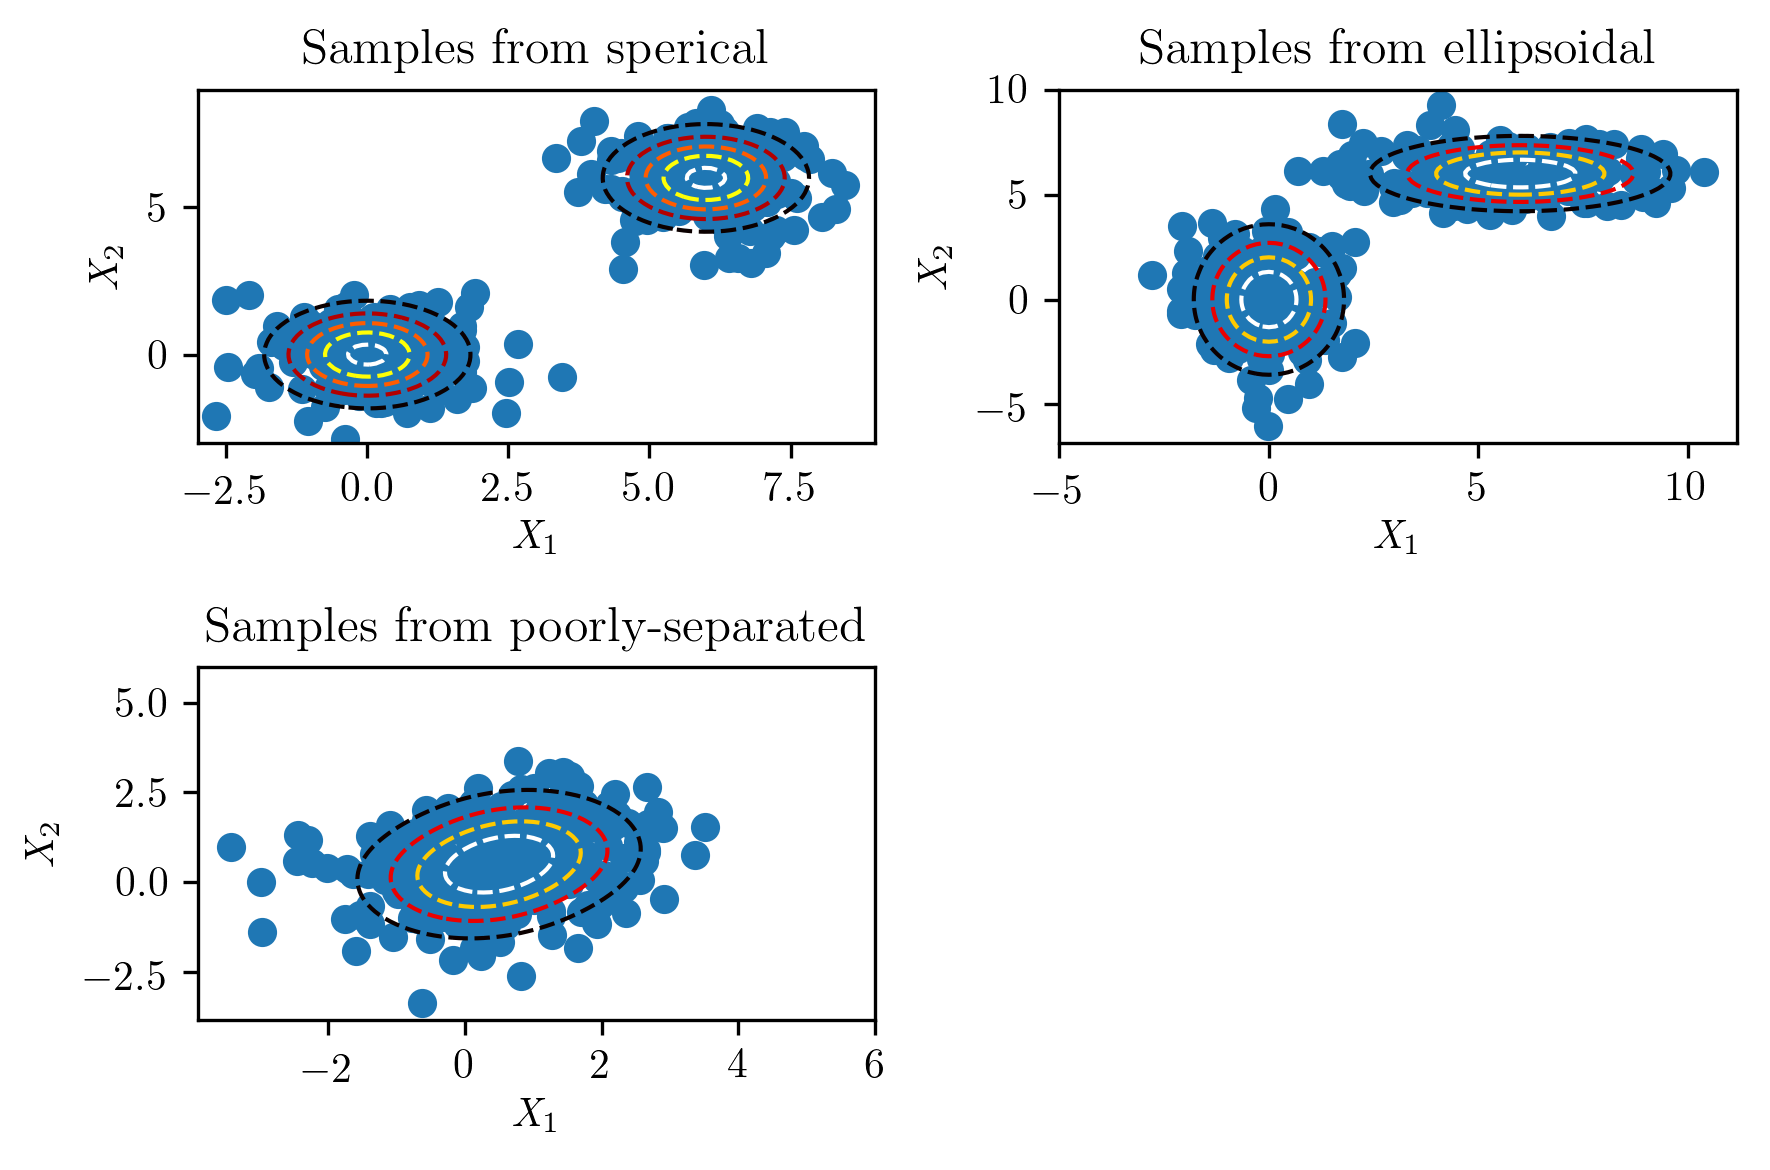

In [9]:
n = 100
x_0 = np.linspace(-3, 9, n)  
y_0 = np.linspace(-3, 9, n)  
X_0,Y_0 = np.meshgrid(x_0, y_0)
XY_0 = np.vstack((X_0.flatten(),Y_0.flatten())).T
p_0 = np.reshape(GMM2_2_300_sphere.pdf(XY_0),(n,n))

plt.figure(dpi=300)
plt.subplot(221)

plt.scatter(Samples[0][:,0],
            Samples[0][:,1],)
C_0 = plt.contour(X_0, Y_0, p_0, 5,alpha=1,linewidths=1,linestyles='dashed',cmap = plt.cm.hot)  
#plt.clabel(C_0,inline=True,fontsize=8,)  
plt.xlabel('$\mathit{X}_1$')
plt.ylabel('$\mathit{X}_2$')
plt.title('Samples from sperical')
plt.legend()

x_1 = np.linspace(-5, 10, n)  
y_1 = np.linspace(-5, 10, n)  
X_1,Y_1 = np.meshgrid(x_1, y_1)
XY_1 = np.vstack((X_1.flatten(),Y_1.flatten())).T
p_1 = np.reshape(GMM2_2_300_ellip.pdf(XY_1),(n,n))

#plt.figure(dpi=300)
plt.subplot(222)
plt.scatter(Samples[1][:,0],
            Samples[1][:,1],)
C_1 = plt.contour(X_1, Y_1, p_1, 5,alpha=1,linewidths=1,linestyles='dashed',cmap = plt.cm.hot) 
plt.xlabel('$\mathit{X}_1$')
plt.ylabel('$\mathit{X}_2$')
plt.title('Samples from ellipsoidal')
plt.legend()

x_2 = np.linspace(-3, 6, n)  
y_2 = np.linspace(-3, 6, n)  
X_2,Y_2 = np.meshgrid(x_2, y_2)
XY_2 = np.vstack((X_2.flatten(),Y_2.flatten())).T
p_2 = np.reshape(GMM2_2_300_vague.pdf(XY_2),(n,n))

#plt.figure(dpi=300)
plt.subplot(223)
plt.scatter(Samples[2][:,0],
            Samples[2][:,1],)
C_2 = plt.contour(X_2, Y_2, p_2, 5,alpha=1,linewidths=1,linestyles='dashed',cmap = plt.cm.hot) 
plt.xlabel('$\mathit{X}_1$')
plt.ylabel('$\mathit{X}_2$')
plt.title('Samples from poorly-separated')
plt.legend()

plt.tight_layout()
plt.show()

Use samples to fit three undetermined GMM respectively.

Record their time elaspings.

In [10]:
import time
GMMs = []
for _ in range(3):
    GMMs.append(GMM(n_components=2,n_features=2,tol=1e-6))
    #GMMs.append(GMM(n_components=2,n_features=2,weights_init=np.array([0.5,0.5]),means_init=np.array([[0,0],[6,6]]),\
    #               covariances_init=np.array([np.identity(2),np.identity(2)]),max_iter=1000))
T = [time.clock()]
GMMs[0].fit(Samples[0],random_init=True)
T.append(time.clock())
GMMs[1].fit(Samples[1],random_init=True)
T.append(time.clock())
GMMs[2].fit(Samples[2],random_init=True)
T.append(time.clock())


In [11]:
print("The time elapsing on shperical model is",T[1]-T[0],"seconds")
print("The time elapsing on ellipsoidal model is",T[2]-T[1],"seconds")
print("The time elapsing on poorly-separated model is",T[3]-T[2],"seconds")

The time elapsing on shperical model is 0.027685709515024186 seconds
The time elapsing on ellipsoidal model is 0.018732694893093465 seconds
The time elapsing on poorly-separated model is 0.1437421820609041 seconds


We see that the time elapsing on poorly-seperated samples fitting is significantly larger than those on shperical samples or ellipsoidal samples. The reason might be that the algorithm need less gradiently directional information to converge.

Define a function that draws an ellipse.

In [12]:
def ovaldrawing(Ce,Cov):
    A = Cov[0,0];B = Cov[1,1];C = Cov[0,1]
    if np.abs(C) < 1e-8:
        beta = 0
    elif np.abs(A-B) < 1e-8:
        if C > 0:
            beta = np.pi/4
        else:
            beta = -np.pi/4
    else:
        beta = np.arctan(2*C/(A-B))/2
    t = np.linspace(0,2*np.pi,100)
    x = np.sqrt(A)*np.cos(t)*np.cos(beta)-np.sqrt(B)*np.sin(t)*np.sin(beta)+Ce[0]
    y = np.sqrt(A)*np.cos(t)*np.sin(beta)+np.sqrt(B)*np.sin(t)*np.cos(beta)+Ce[1]
    return x,y

Scatter the estimated GMM subpopulations and the memberships of samples.

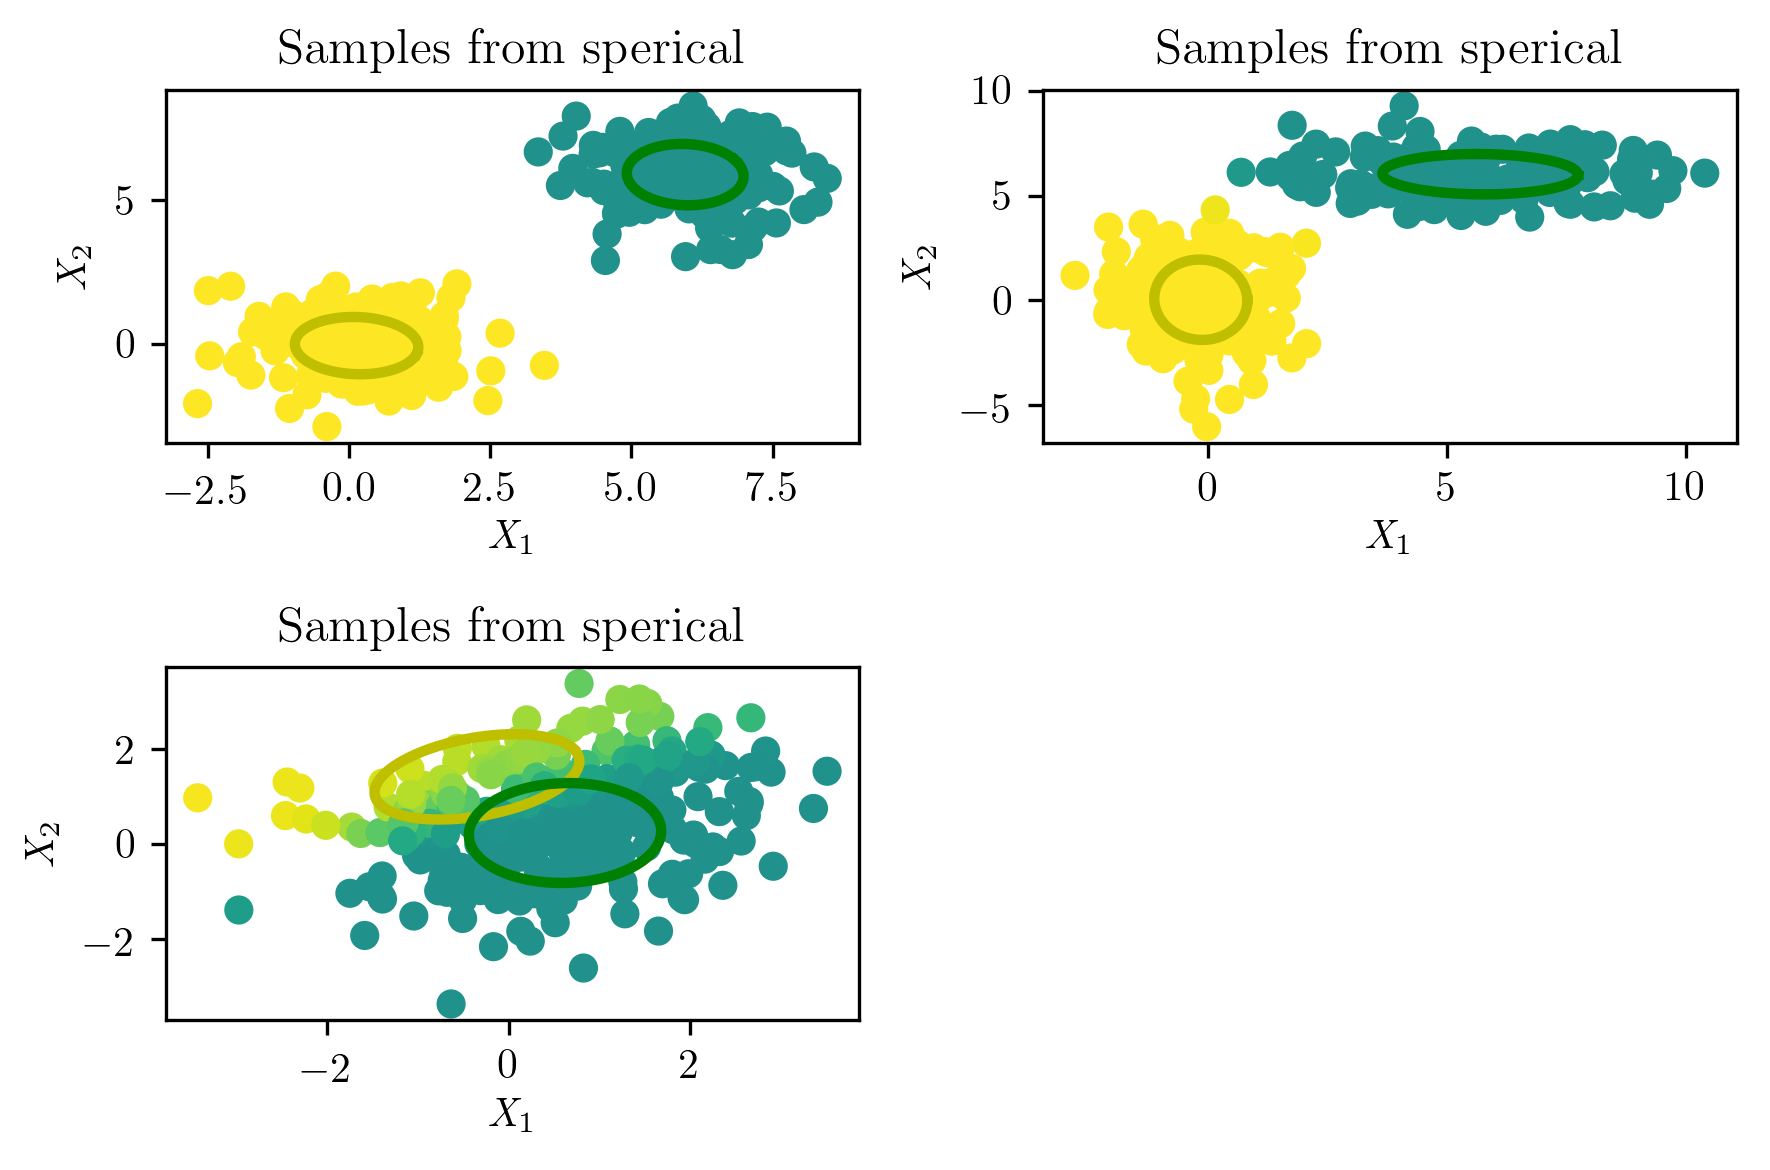

In [13]:
labels = [GMMs[i].labels_ for i in range(3)]
memberships = [GMMs[i].membership_ for i in range(3)]
means = [GMMs[i].means_ for i in range(3)]
covariances = [GMMs[i].covariances_ for i in range(3)]
color = []
for i in range(3):
    if np.sum(memberships[i][:,0])<np.sum(memberships[i][:,1]):
        memberships[i] = memberships[i][:,0]
        color.append(['y','g'])
    else:
        memberships[i] = memberships[i][:,1]
        color.append(['g','y'])

plt.figure(dpi=300)
plt.subplot(221)
plt.scatter(Samples[0][:,0],Samples[0][:,1],vmin=-1, vmax=1,c=memberships[0])
#C_0 = plt.contour(X_0, Y_0, p_0, 6,alpha=1,linewidths=0.5,linestyles='dashed',cmap = plt.cm.hot)  
#plt.clabel(C_0,inline=True,fontsize=8,)  
plt.xlabel('$\mathit{X}_1$')
plt.ylabel('$\mathit{X}_2$')
plt.title('Samples from sperical')
xt,yt = ovaldrawing(means[0][0,:],covariances[0][0,:,:])
plt.plot(xt,yt,linewidth = 2.5,c=color[0][0])
xt,yt = ovaldrawing(means[0][1,:],covariances[0][1,:,:])
plt.plot(xt,yt,linewidth = 2.5,c=color[0][1])
plt.legend()


plt.subplot(222)
plt.scatter(Samples[1][:,0],Samples[1][:,1],vmin=-1, vmax=1,c=memberships[1])
#C_0 = plt.contour(X_0, Y_0, p_0, 6,alpha=1,linewidths=0.5,linestyles='dashed',cmap = plt.cm.hot)  
#plt.clabel(C_0,inline=True,fontsize=8,)  
plt.xlabel('$\mathit{X}_1$')
plt.ylabel('$\mathit{X}_2$')
plt.title('Samples from sperical')
xt,yt = ovaldrawing(means[1][0,:],covariances[1][0,:,:])
plt.plot(xt,yt,linewidth = 2.5,c=color[1][0])
xt,yt = ovaldrawing(means[1][1,:],covariances[1][1,:,:])
plt.plot(xt,yt,linewidth = 2.5,c=color[1][1])
plt.legend()

plt.subplot(223)
plt.scatter(Samples[2][:,0],Samples[2][:,1],vmin=-1, vmax=1,c=memberships[2])
#C_0 = plt.contour(X_0, Y_0, p_0, 6,alpha=1,linewidths=0.5,linestyles='dashed',cmap = plt.cm.hot)  
#plt.clabel(C_0,inline=True,fontsize=8,)  
plt.xlabel('$\mathit{X}_1$')
plt.ylabel('$\mathit{X}_2$')
plt.title('Samples from sperical')
xt,yt = ovaldrawing(means[2][0,:],covariances[2][0,:,:])
plt.plot(xt,yt,linewidth = 2.5,c=color[2][0])
xt,yt = ovaldrawing(means[2][1,:],covariances[2][1,:,:])
plt.plot(xt,yt,linewidth = 2.5,c=color[2][1])
plt.legend()

plt.tight_layout()
plt.show()

Now we use our GMM object on Exp 1: Old Faith. We can see that the clustering is pretty good.

Note that the original Old Faith data is spreaded widely on ${{\mathbb{R}}^{2}}$. An ill effect of directly fitting the original data is that it makes the PDF of the GMM so small that it could cause arithmetic underflow. One solution to this effect is doing linear normalization on the data before we fit them. After fitting we recover the data to plot, then.

In [14]:
import copy

GMM_old_faithfull = GMM(n_components=2,n_features=2,tol=1e-6)
Max_y = np.max(X[:,1]);Min_y = np.min(X[:,1])
X_pp = copy.copy(X)
X_pp[:,1] = (X[:,1]-Min_y)/(Max_y-Min_y)
ky = (Max_y-Min_y)
GMM_old_faithfull.fit(X_pp,random_init=True)

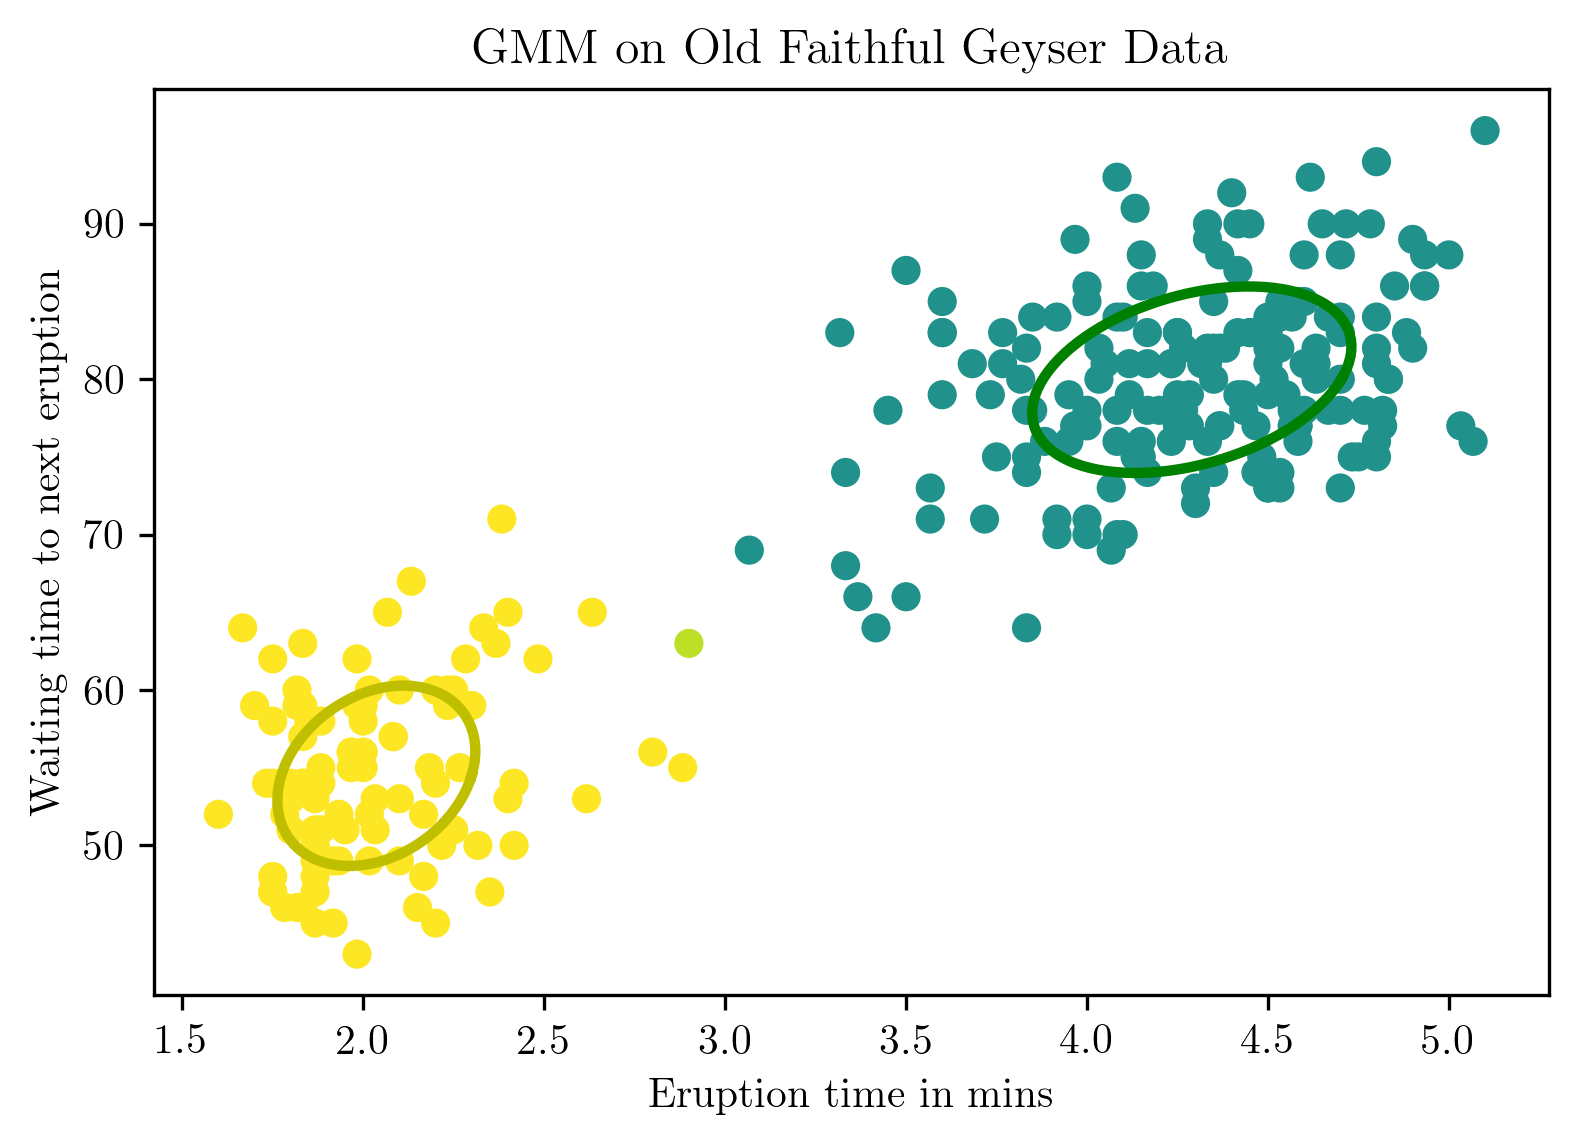

In [15]:
X_membership = GMM_old_faithfull.membership_
X_means = GMM_old_faithfull.means_
X_Cov = GMM_old_faithfull.covariances_

plt.figure(dpi=300)
plt.scatter(X[:,0],X[:,1],vmin=-1, vmax=1,c=X_membership[:,0])
#C_0 = plt.contour(X_0, Y_0, p_0, 6,alpha=1,linewidths=0.5,linestyles='dashed',cmap = plt.cm.hot)  
#plt.clabel(C_0,inline=True,fontsize=8,)  
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('GMM on Old Faithful Geyser Data')
xt,yt = ovaldrawing((X_means[0,:]*np.array([1,ky])+np.array([0,Min_y])),X_Cov[0,:,:]*np.array([[1,ky],[ky,ky**2]]))
plt.plot(xt,yt,linewidth = 2.5,c='y')
xt,yt = ovaldrawing((X_means[1,:]*np.array([1,ky])+np.array([0,Min_y])),X_Cov[1,:,:]*np.array([[1,ky],[ky,ky**2]]))
plt.plot(xt,yt,linewidth = 2.5,c='g')
plt.legend()

## Exp.3 [Clusters of Text]
--------------------------------------------

We will use K_Means object we wrote in Exp.1 to cluster "nips-87-92" data set. Each entry in "nips-87-92" has over 11000 dimensions so that it's impossible for us to scatter them to get the value of `k` we need in K-means Clustering.

There are several methods, however, to choose `k` automatically. One way is to find the "Elbow" point on the Inertia-k plot, since the elbow point is generally considered to represent such a `k` that can overally cluster the data well. We will first use this method to try find the best `k` value.

Load data set, and show its head 6 rows.

In [4]:
import pandas as pd
f1 = open('C:\\Users\\ZING\\Desktop\\511\\proj3\\nips-87-92.csv')
nips_87_92 = pd.read_csv(f1,index_col=0) 

In [5]:
print(nips_87_92.head(6))

   doc_id  abalone  abbeel  abbott  abbreviate  abbreviated  abc  abeles  \
0  1987_1        0       0       0           0            0    0       0   
1  1987_2        0       0       0           0            0    0       0   
2  1987_3        0       0       0           0            0    0       0   
3  1987_4        0       0       0           0            0    0       0   
4  1987_5        0       0       0           0            0    0       0   
5  1987_6        0       0       0           0            0    0       0   

   abernethy  abilistic   ...    zhou  zhu  zien  zilberstein  zones  zoo  \
0          0          0   ...       0    0     0            0      0    0   
1          0          0   ...       0    0     0            0      0    0   
2          0          0   ...       0    0     0            0      0    0   
3          0          0   ...       0    0     0            0      0    0   
4          0          0   ...       0    0     0            0      0    0   
5    

We find the first column is a time sequence and it therefore contributes nothing to the clustering. Drop it.

In [6]:
nips_87_92_data = nips_87_92.values[:,1:]
names = nips_87_92.names
print(nips_87_92_data.shape)

(700, 11463)


Normalize data set so that the all features start from zeros and the sum for each feature over sample id is one.

During normalization, we remove those features that don't change at all. We finally reserve 9876 features.

In [8]:
neqiloc = np.where(np.max(nips_87_92_data,0) != np.min(nips_87_92_data,0))[0]
nips_Max = np.array(np.max(nips_87_92_data,0))[neqiloc]
nips_Min = np.array(np.min(nips_87_92_data,0))[neqiloc]
nips_norm_data = np.array(nips_87_92_data,dtype=np.float32)[:,neqiloc]
nips_norm_data = (nips_norm_data - nips_Min) / (nips_Max - nips_Min)
nips_norm_data = nips_norm_data / np.sum(nips_norm_data,0)
nips_norm_data = np.array(nips_norm_data,dtype=np.float32)

In [9]:
print(nips_norm_data.shape)

(700, 9876)


The number of remaining features is still too large. We now use Principal Components Analysis(PCA) to reduce it. We finally reserve 5 components.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5);
pca.fit(nips_norm_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
new_nips_norm_data=pca.transform(nips_norm_data)
print(new_nips_norm_data.shape)
print(new_nips_norm_data[0:6,0:6])

(700, 5)
[[-0.00982094 -0.01075106 -0.00462321 -0.00325129 -0.0153892 ]
 [-0.01429272 -0.00637903 -0.00825893 -0.00178671  0.00161083]
 [-0.01071979 -0.00959536 -0.00615936 -0.00075033 -0.0115008 ]
 [-0.0146783  -0.01034204 -0.00216053 -0.00268973  0.00204963]
 [-0.00848869 -0.02134231 -0.01437013 -0.0156356   0.01159796]
 [-0.01127259 -0.00644936  0.00636006 -0.00290092 -0.00856633]]


Run K_Means sequences over `k=2~40`.

Plot the inertias.

In [38]:
nk = 39
nips_KMeans = [K_Means(n_clusters=2+i,max_iter=300,tol=1e-2) for i in range(nk)]
nips_C = []
nips_labels = []
nips_converged = []
nips_inertia = np.zeros([nk])
for i in range(nk):
    nips_KMeans[i].fit(new_nips_norm_data)
    nips_C.append(nips_KMeans[i].cluster_centers_)
    nips_labels.append(nips_KMeans[i].labels_)
    nips_inertia[i] = nips_KMeans[i].inertia_
    nips_converged.append(nips_KMeans[i].converged_)


In [39]:
print(nips_inertia)
print(nips_converged)

[ 38.23208111  35.99512095  31.54673388  26.40444995  29.66322338
  22.55513936  22.08036042  21.19458523  24.3894087   18.92476967
  22.09184308  23.10749424  14.3999104   14.30722906  13.96847149
  14.4035795   14.88110738  13.55746359  14.77395026  15.48287266
  13.77115584  19.63180881  17.32993724  13.12198851  13.86894957
  13.96747431  13.35703439  18.73295371  12.79385275  13.27001639
  14.57653365  13.60750025  13.12326117  12.66224962  13.23140017
  18.31725513  12.94446632  12.28466156  12.56594001]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


We can find an obvious elbow point (`k=12`) from the plot. 

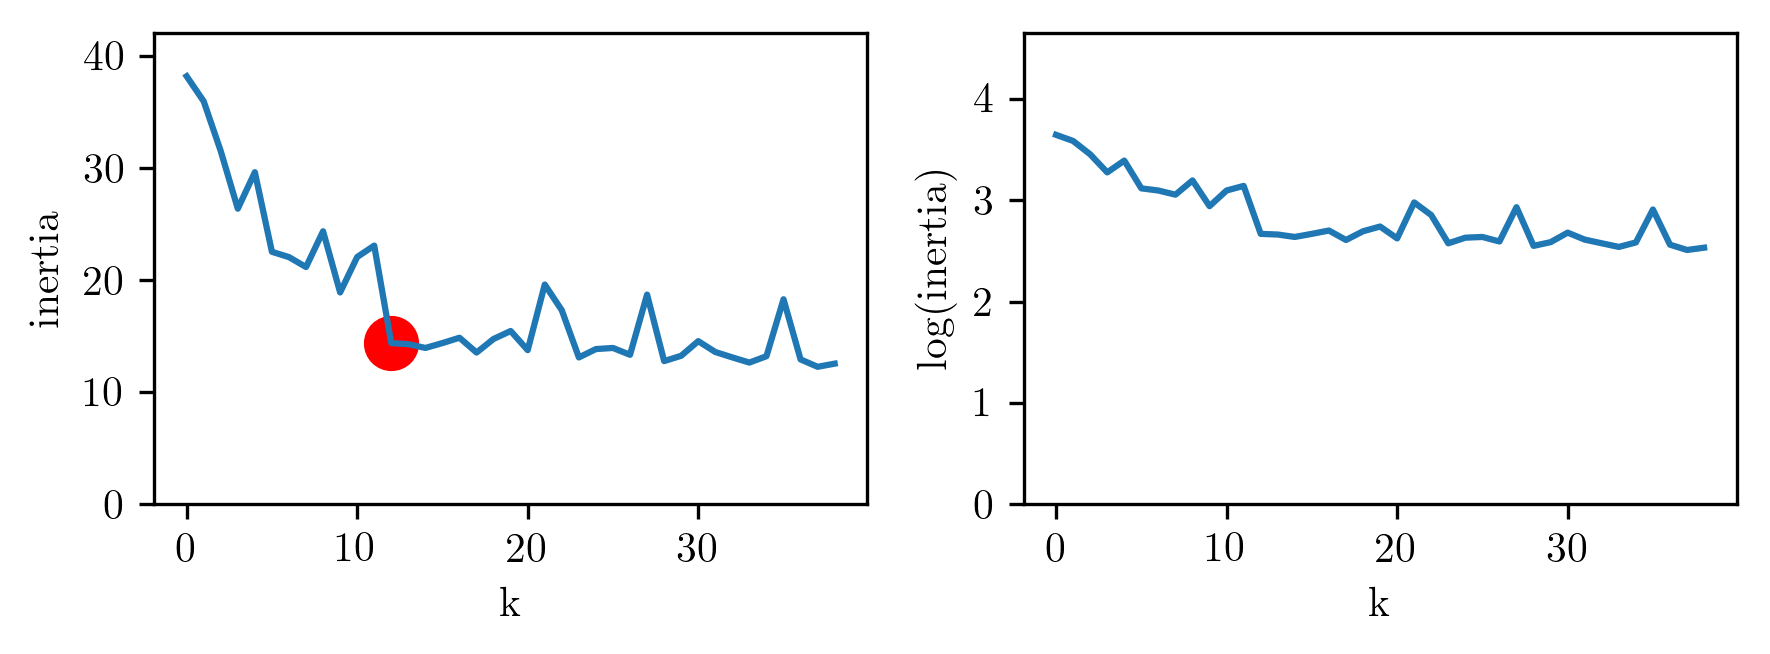

In [48]:
plt.figure(dpi=300)

plt.subplot(221)
plt.plot(range(nk),nips_inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.ylim([0,np.max(nips_inertia)*1.1])
plt.scatter(12,nips_inertia[np.where(np.arange(nk)==12)], s=150, c='r')

plt.subplot(222)
plt.plot(range(nk),np.log(nips_inertia))
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.ylim([0,np.log(np.max(nips_inertia))+1])

plt.tight_layout()

Another way is Gap Statistic by Robert Tibshirani, Guenther Walther and Trevor Hastie(https://web.stanford.edu/~hastie/Papers/gap.pdf). 

Gap Statistic is defined as

$$\text{Gap}(k)=\mathbb{E}\left(\log D_k\right)-\log D_k$$

From a range of $\log D_k$, we find the $k$ that maximizes $\text{Gap}(k)$ as the optimal `k`.

We use `gap_statistic` toolbox by [milesgranger](https://github.com/milesgranger/), verifying the result we got by elbow method.

In [41]:
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
optimalK


OptimalK(n_jobs=4, parallel_backend="joblib")

In [42]:
n_clusters = optimalK(new_nips_norm_data, cluster_array=np.arange(2, 2+nk))
print('Optimal clusters: ', n_clusters)

Optimal clusters:  28


In [43]:
optimalK.gap_df.head()

,gap_value,n_clusters
0,1.527690,2.0
1,1.679244,3.0
2,1.947552,4.0
3,2.523433,5.0
4,2.483463,6.0


Text(0.5,1,'Gap Values by Cluster Count')

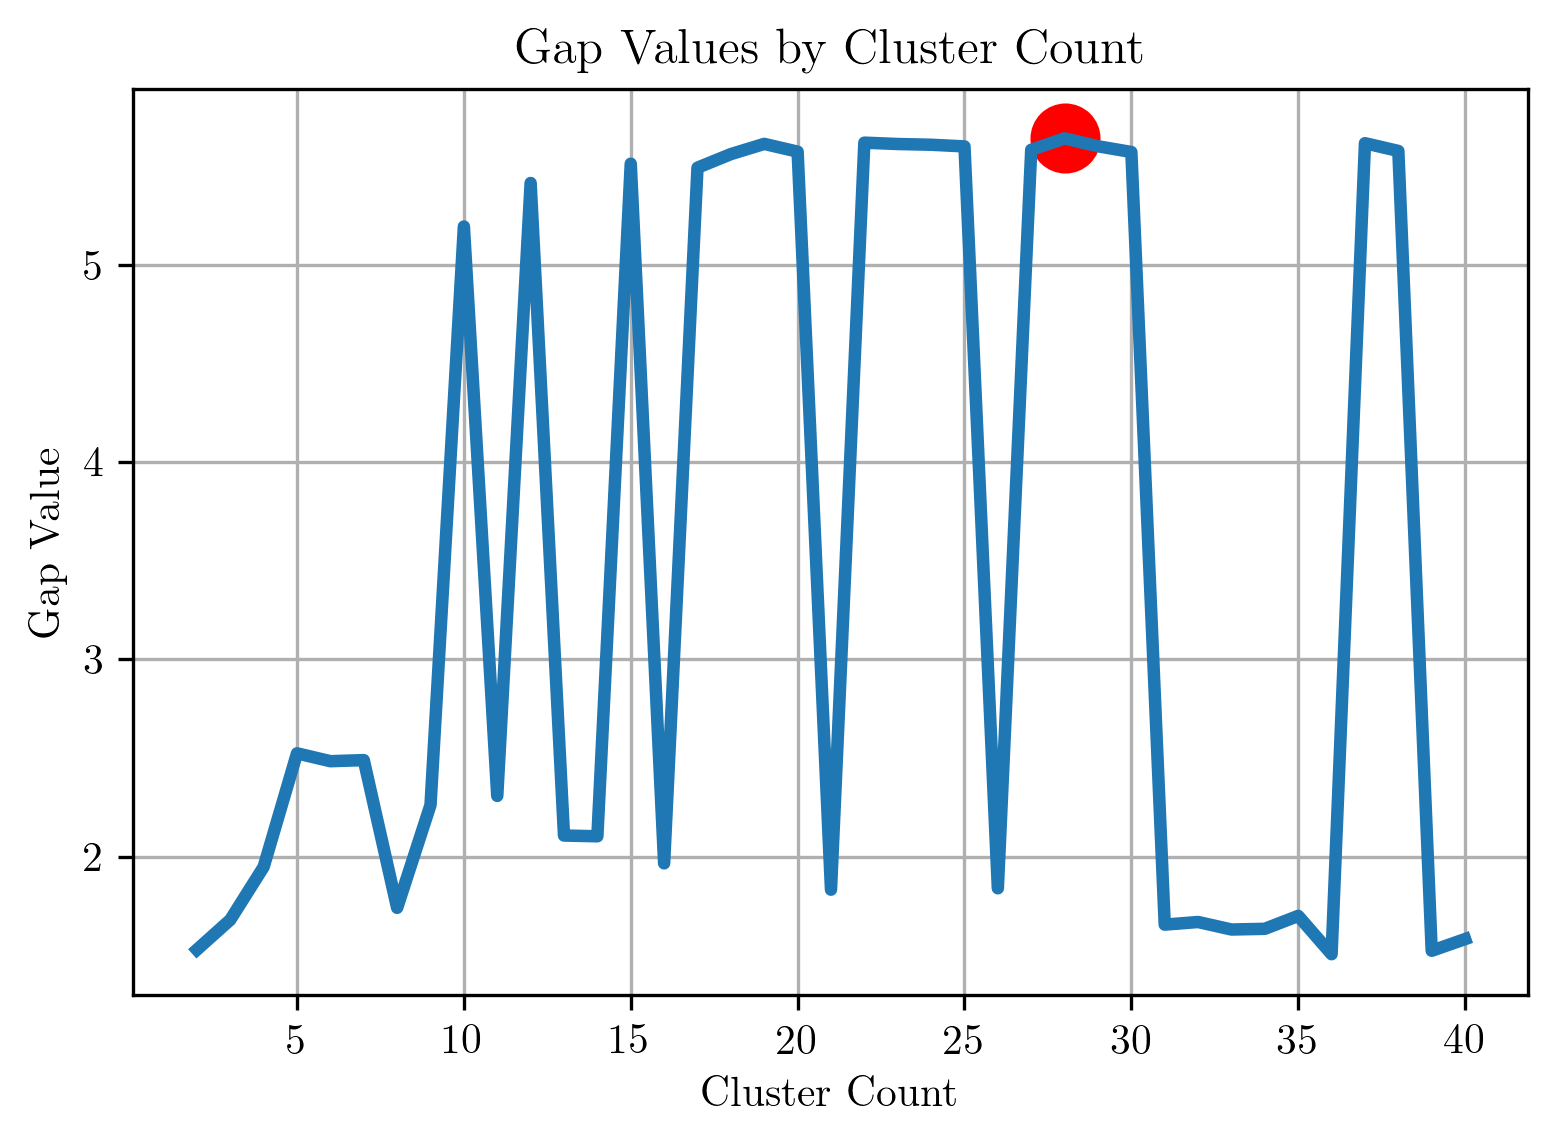

In [49]:
plt.figure(dpi=300)
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')


Gap Statistic shows we need choose `k=28`. However, we find that when `k>10`, the max Gap value is prone to be stable. We prefer a small `k`, when `k=12` the Gap value reaches a local maxima, so we still choose `k=12`.

Given `k=12`, the labels are following:

In [50]:
from prettytable import PrettyTable
col = PrettyTable()
col.add_column("doc_id",nips_87_92.values[:,0])
col.add_column("label",nips_labels[10])

In [51]:
print(col)

+----------+-------+
|  doc_id  | label |
+----------+-------+
|  1987_1  |   3   |
|  1987_2  |   3   |
|  1987_3  |   3   |
|  1987_4  |   3   |
|  1987_5  |   3   |
|  1987_6  |   3   |
|  1987_7  |   0   |
|  1987_8  |   3   |
|  1987_9  |   0   |
| 1987_10  |   0   |
| 1987_11  |   3   |
| 1987_12  |   0   |
| 1987_13  |   3   |
| 1987_14  |   3   |
| 1987_15  |   3   |
| 1987_16  |   0   |
| 1987_17  |   3   |
| 1987_18  |   3   |
| 1987_19  |   3   |
| 1987_20  |   3   |
| 1987_21  |   3   |
| 1987_22  |   3   |
| 1987_23  |   3   |
| 1987_24  |   3   |
| 1987_25  |   3   |
| 1987_26  |   0   |
| 1987_27  |   3   |
| 1987_28  |   3   |
| 1987_29  |   3   |
| 1987_30  |   3   |
| 1987_31  |   3   |
| 1987_32  |   3   |
| 1987_33  |   3   |
| 1987_34  |   3   |
| 1987_35  |   9   |
| 1987_36  |   3   |
| 1987_37  |   3   |
| 1987_38  |   3   |
| 1987_39  |   0   |
| 1987_40  |   3   |
| 1987_41  |   3   |
| 1987_42  |   3   |
| 1987_43  |   0   |
| 1987_44  |   3   |
| 1987_45  | 

Histogram for labels:

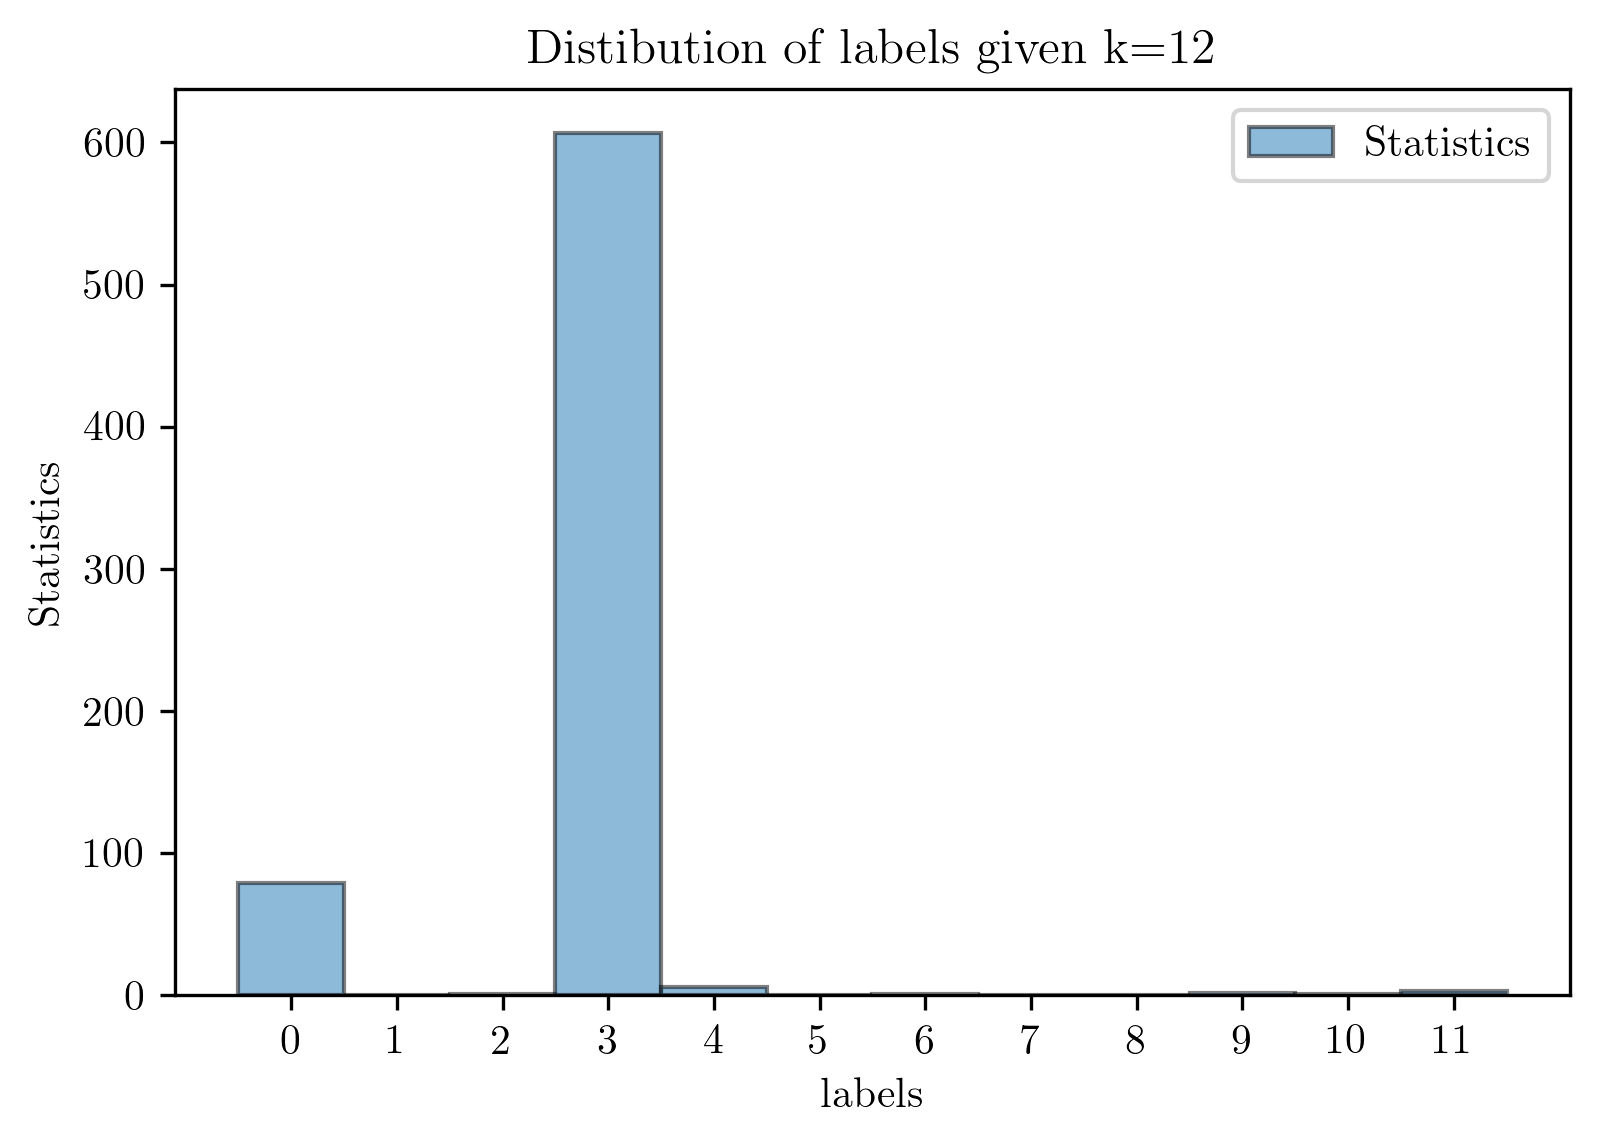

In [52]:
plt.figure(dpi=300)
plt.hist(nips_labels[10], bins = np.arange(0,13,1), edgecolor = 'black', \
         alpha = 0.5, label = 'Statistics') 
plt.legend(loc='upper right')
plt.ylabel('Statistics')
plt.xlabel('labels')
plt.title('Distibution of labels given k=12')
_ = plt.xticks(np.arange(0,12,1)+0.5,[str(i) for i in np.arange(0,12,1)])

The histogram above may further suggest that we could choose `k=4`.